11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 63ms/step - accuracy: 0.8686 - loss: 0.4251 - val_accuracy: 0.9855 - val_loss: 0.0501
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 59ms/step - accuracy: 0.9824 - loss: 0.0558 - val_accuracy: 0.9874 - val_loss: 0.0365
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.9880 - loss: 0.0364 - val_accuracy: 0.9904 - val_loss: 0.0314
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 57ms/step - accuracy: 0.9911 - loss: 0.0276 - val_accuracy: 0.9890 - val_loss: 0.0353
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 58ms/step - accuracy: 0.9931 - loss: 0.0214 - val_accuracy: 0.9914 - val_loss: 0.0267
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9885 - loss: 0.0368
Test accuracy: 0.9914


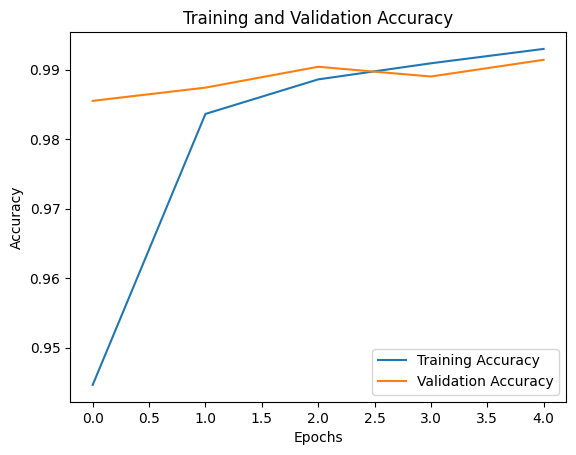

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Predicted: 7, Actual: 7


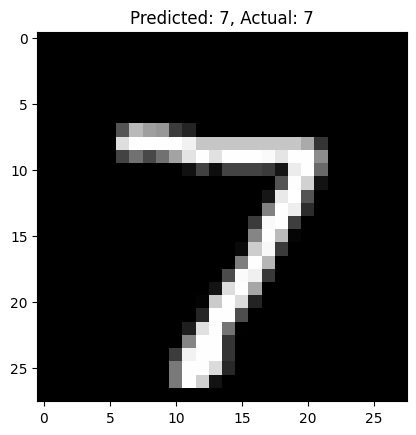

Predicted: 2, Actual: 2


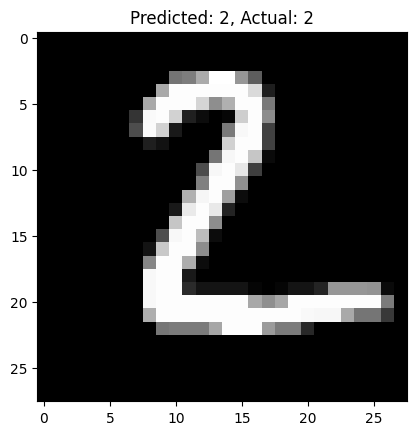

Predicted: 1, Actual: 1


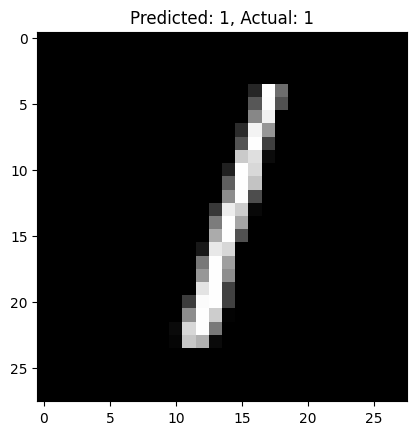

Predicted: 0, Actual: 0


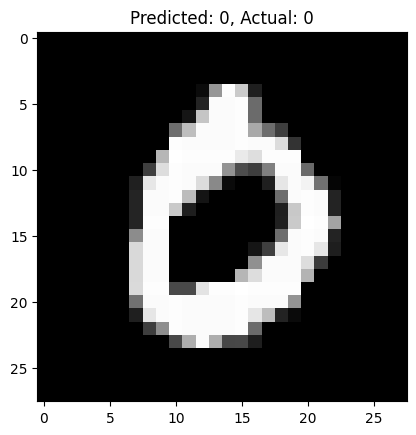

Predicted: 4, Actual: 4


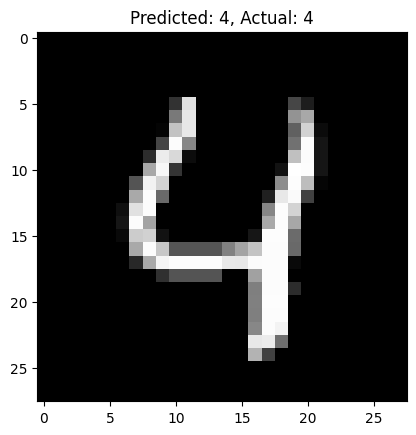

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset (28x28 grayscale images of digits)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
# Normalize the image data to a range of 0 to 1 by dividing by 255
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to match the input shape for the CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Build the CNN model
model = models.Sequential()

# Add convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add pooling layer to reduce spatial dimensions
model.add(layers.MaxPooling2D((2, 2)))

# Add second convolutional layer with 64 filters, 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add second pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add third convolutional layer with 64 filters, 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the 3D output to 1D for the fully connected layers
model.add(layers.Flatten())

# Add a dense layer with 64 units and ReLU activation
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 units (for the 10 digits) and softmax activation for classification
model.add(layers.Dense(10, activation='softmax'))

# Compile the model with an appropriate loss function and optimizer
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Make predictions on a test image
predictions = model.predict(x_test[:5])

# Print out predictions for the first 5 test images
for i, prediction in enumerate(predictions):
    print(f"Predicted: {prediction.argmax()}, Actual: {y_test[i]}")

    # Display the image
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {prediction.argmax()}, Actual: {y_test[i]}")
    plt.show()
